# Decision Tree with the Iris Dataset

For an explanation of decision trees, see [our course notes](https://jennselby.github.io/MachineLearningCourseNotes/#decision-trees).

This notebook uses example code from http://scikit-learn.org/stable/modules/tree.html.

## Instructions
0. If you haven't already, follow [the setup instructions here](https://jennselby.github.io/MachineLearningCourseNotes/#setting-up-python3) to get all necessary software installed.
0. Install the software specific to this notebook, as explained in the [Setup](#Setup) section.
0. Read through the code in the following sections:
    * [Iris Dataset](#Iris-Dataset)
    * [Visualization of Dataset](#Visualization-of-Dataset)
    * [Model Training](#Model-Training)
    * [Visualization of Model Output](#Visualization-of-Model-Output)
    * [Prediction](#Prediction)
0. Complete one or both exercise options:
    * [Exercise Option #1 - Standard Difficulty](#Exercise-Option-#1---Standard-Difficulty)
    * [Exercise Option #2 - Advanced Difficulty](#Exercise-Option-#2---Advanced-Difficulty)

## Setup

Before you can run this code, you will need to install some extra software.

1. Install homebrew (if you don't already have it) following the [directions on their site](https://brew.sh/).
1. Install the graphviz library that will let us visualize the decision tree. In Terminal, run
>`brew install graphviz`
1. Install the pydot library that allows you to call graphviz from Python. In Terminal run
>`pip3 install pydot`.

In [22]:
from sklearn.datasets import load_iris # the iris dataset is included in scikit-learn
from sklearn import tree # for fitting our model

# these are all needed for the particular visualization we're doing
from six import StringIO
import pydot
import os.path

# to display graphs in this notebook
%matplotlib inline
import matplotlib.pyplot

## Iris Dataset

Before you go on, make sure you understand this dataset. Modify the cell below to examine different parts of the dataset that are contained in the 'iris' dictionary object.

What are the features? What are we trying to classify?

In [23]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

You can also try looking at it using a [pandas dataframe](https://jennselby.github.io/MachineLearningCourseNotes/#pandas).

In [24]:
import pandas
iris_df = pandas.DataFrame(iris.data)
iris_df.columns = iris.feature_names
iris_df['target'] = [iris.target_names[target] for target in iris.target]
iris_df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa

In [25]:
iris_df.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000

## Visualization of Dataset

Let's visualize our dataset, so that we can better understand what it looks like.

Change the first two variables to change which features you are looking at.

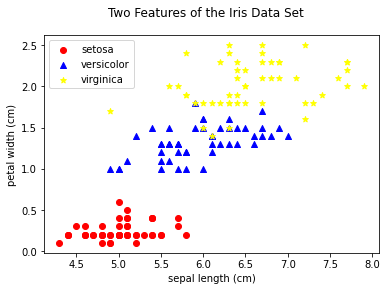

In [26]:
# Plot two of the features (the first and fourth columns, in this case)
x1_feature = 0
x2_feature = 3

x1 = iris.data[:,x1_feature]
x2 = iris.data[:,x2_feature]

# The data are in order by type. Find out where the other types start
start_type_one = list(iris.target).index(1)
start_type_two = list(iris.target).index(2)

# create a figure and label it
fig = matplotlib.pyplot.figure()
fig.suptitle('Two Features of the Iris Data Set')
matplotlib.pyplot.xlabel(iris.feature_names[x1_feature])
matplotlib.pyplot.ylabel(iris.feature_names[x2_feature])

# put the input data on the graph, with different colors and shapes for each type
scatter_0 = matplotlib.pyplot.scatter(x1[:start_type_one], x2[:start_type_one],
                                      c="red", marker="o", label=iris.target_names[0])
scatter_1 = matplotlib.pyplot.scatter(x1[start_type_one:start_type_two], x2[start_type_one:start_type_two],
                                      c="blue", marker="^", label=iris.target_names[1])
scatter_2 = matplotlib.pyplot.scatter(x1[start_type_two:], x2[start_type_two:],
                                      c="yellow", marker="*", label=iris.target_names[2])

# add a legend to explain which points are which
matplotlib.pyplot.legend(handles=[scatter_0, scatter_1, scatter_2])

# show the graph
matplotlib.pyplot.show()

## Model Training

Next, we want to fit our decision tree model to the iris data we're using.

In [27]:
# Train the model
model = tree.DecisionTreeClassifier()
model.fit(iris.data, iris.target)

DecisionTreeClassifier()

## Visualization of Model Output

Using graphviz and pydot, we can create a flowchart that shows the model decisions. The flowchart will be printed to a PDF on your desktop.

In [28]:
dot_data = StringIO()
tree.export_graphviz(model, out_file=dot_data, feature_names=iris.feature_names, class_names=iris.target_names,
                     filled=True, rounded=True, special_characters=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]
graph.write_pdf(os.path.expanduser("~/Desktop/iris_decision_tree.pdf"))

## Prediction

Now we can make some predictions using the trained model. We'll pull out some examples from our training data and see what the model says about them.

In [29]:
# Use the first input from each class
inputs = [iris.data[0], iris.data[start_type_one], iris.data[start_type_two]]

print('Class predictions: {0}'.format(model.predict(inputs))) # guess which class
print('Probabilities:\n{0}'.format(model.predict_proba(inputs))) # give probability of each class

Class predictions: [0 1 2]
Probabilities:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


# Exercise Option #1 - Standard Difficulty

Answer the following questions. You may find it helpful to compare the PDF output to the graph above (remember you can change which columns the graph is displaying), to see the boundaries the decision tree is finding.

0. Submit the PDF you generated as a separate file in Canvas.

1. According to the PDF, what feature values would tell you with high probability that you were looking at a setosa iris?
   if the petal length is bigger than 1.75cm but smaller than 2.45cm.
    
2. According to the PDF, which features would you look at to tell a virginica from a versicolor?
    The petel length and the value. petal length (cm) ≤ 4.95 vs petal length (cm) ≤ 4.85 (versicolor vs virginica) and value = [0, 49, 5] vs value = [0, 1, 45] (versicolor vs virginica). There are also significant differences in the gini, about a 0.125 difference. 
    
3. What is the value array in the PDF showing?
    50+50+50 is the number of values the dataset has, each kind of flower has a specific number of samples which are part of that class. The rest of the arrays is a way of distinguishing the differences, between each of the flowers.
    
4. The predictions just above are all 100% confident in the correct answer. If you try using other data points from the training data, you'll find the same thing. Why is that always true for our Decision Tree?
    The predictions above are 100% correct because the decision tree has an outcome for all 150 samples, hence whatever the flower ends up on, has to be 100% correct.
    
5. Try using subsets of the input data (look at the iris_inputs variable in [LogisticRegressionIris](https://nbviewer.jupyter.org/github/jennselby/MachineLearningCourseNotes/blob/master/assets/ipynb/LogisticRegressionIris.ipynb) to see how to use only some of the columns in the model). How does this change the decision tree?



# Exercise Option #2 - Advanced Difficulty

Try fitting a Random Forest model to the iris data. See [this example](http://scikit-learn.org/stable/modules/ensemble.html#forest) to help you get started.

How does the performance and output of Random Forest compare to the single Decision Tree? Since you can't get the graphical representation of the Random Forest model the way we did for the single Decision Tree, you'll have to think of a different way to understand what the model is doing. Think about how we can [validate the performance of our classifier models](https://jennselby.github.io/MachineLearningCourseNotes/#classification-validation).

In [30]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10) #create randomforest model
clf = clf.fit(iris.data, iris.target) #fit the data to the model

inputs = [iris.data[0], iris.data[start_type_one], iris.data[start_type_two]] #define inputs

print('Class predictions: {0}'.format(clf.predict(inputs))) # guess which class
print('Probabilities:\n{0}'.format(clf.predict_proba(inputs))) # give probability of each class

Class predictions: [0 1 2]
Probabilities:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


Average precision-recall score: 0.88


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.88')

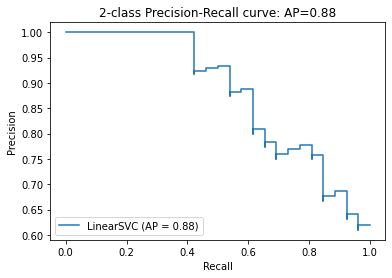

In [31]:
#VALIDATION - Borrowed/Edited code from:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

"""
Livi's explanation of the following code:

    The following code uses sklearn's precision recale libraries to plot and graphically show the precision recall
    curve. The first part consists of us importing the necessary libraries, and defining out iris data. Then we 
    generate fake noise, to add inconsistancy to our data. Without noise we cannot (best) prove that our model 
    actually works, as the data would have linear consistancy. We then split our data into training and testing data
    arrays. So that we train using the data, and then test the data to see if the model is accurate. After, we create
    a classifier, which is used to classify the data (hence the name classifier). Finally, we calculate the percision
    plot it against the data!

"""
    
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve


iris = load_iris() #load the iris data
X = iris.data #define data
y = iris.target #define target
    
#generate noise
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]


#split into training and test arrays
X_train, X_test, y_train, y_test = train_test_split(X[y < 2], y[y < 2],
                                                test_size=.5,
                                                random_state=random_state)

#create a classifier
classifier = svm.LinearSVC(random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)

#calculate average precision
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

#plot
disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))


1. What is the best highest possible score you could get?


If the highest score is calculated by the least difference, then theoretically 1, but that is logically impossible as with AI there is (currently and theoretically) no such thing as a perfect model (100% accuracy).

If your model simply predicted the average value of the training set no matter what the input was, what score would you get on a test set whose average matched that of the training set?

0, because it would be 1 - [(avg - truth)^2 over (avg - truth)^2.] 

2. What is the lowest score that you can get?

The lowest score that you could get is 0, but can become negative. "Because R-square is defined as the proportion of variance explained by the fit, if the fit is actually worse than just fitting a horizontal line then R-square is negative." https://web.maths.unsw.edu.au/~adelle/Garvan/Assays/GoodnessOfFit.html#:~:text=Note%20that%20it%20is%20possible,then%20R%2Dsquare%20is%20negative.

3. When using accuracy to measure your model's performance on a classification problem:
    What is the best possible score you could get?

1 (100%) would be the best score.


4. If your model always predicted the same class no matter what the input, what score would you get on a test set where 85% of the items were in that class?

85/(85+15) = 0.85


6. What is the worst possible score you can get on a dataset that only has two classes?

.50(50%) because you don't know what is what? The model is basically guessing.


7. A model gets a recall score of 0 for class A on a test set with classes A, B, and C. If you take one of the test items that are in class A and have this model predict what class it is, what will it predict?

It will either predict B or C, since it doesn't correctly predict inputs that are supposed to go in class A.


8. A model gets a precision score of 1 for class A on a test set with classes A, B, and C. If you take one of the test items that are in class A and have your model predict what class it is, what will it predict?

It will predict class A. The reason why, is, because it is checking for the difference between the times it is true over the difference between the times its true and false, than that means the fraction one the way or the other equals 1/1 -- which is 1. So if the equation/way to solve precision equals one, then the model should never make a mistake.


9. If a model with classes A and B has an AUC score of 1 and you give it an item from the test set that is in class A, what class will it predict and what probability will it give for that class?

If the AUC has a score of 1, that means that it will predict that its in class A, probability of 100%. An AUC score of 1 means that the True Positive Rate is at 100% all the time, meaning that its always true because there simply are no false negatives.


10. If a model with classes A and B has an AUC score of 0 and you give it an item from the test set that is in class A, what class will it predict and what probability will it give for that class?

If the AUC has a score of 0, than it will predict class A, with a probability of 0%. An AUC score means that there are no true positive answers that they model has given back, which means that it won't predict well (at all), hence the probability of 0%. It is 0% because a score of 0, means that the there are no true positives, and all true negatives.